In [2]:
import pickle 

import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold 
from sklearn import svm

from sklearn.metrics import roc_curve, classification_report, confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, precision_recall_curve, f1_score, roc_auc_score
%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.utils.class_weight import compute_class_weight


In [3]:
d_ts=pd.read_csv(r"C:\Users\Admin\Desktop\python\project 6\test_share.csv".replace('\\', '/'))
                
d_ts.shape  

(10854, 5)

In [4]:
d_tr=pd.read_csv(r"C:\Users\Admin\Desktop\python\project 6\train.csv".replace('\\', '/'))
d_tr.shape

(99490, 6)

In [5]:
d_dem=pd.read_csv(r"C:\Users\Admin\Desktop\python\project 6\demographic_details.csv".replace('\\', '/'))  
d_dem.shape

(62299, 5)

In [6]:
d_med=pd.read_csv(r"C:\Users\Admin\Desktop\python\project 6\medical_history.csv".replace('\\', '/'))
d_med.shape


(62299, 5)

In [7]:
d_join=pd.merge(d_med,d_dem,on=['PatientId'],how='outer')
d_join

,PatientId,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship
0,2.987250e+13,1,0,0,0,F,62,JARDIM DA PENHA,0
1,5.589978e+14,0,0,0,0,M,56,JARDIM DA PENHA,0
2,4.262962e+12,0,0,0,0,F,62,MATA DA PRAIA,0
3,8.679512e+11,0,0,0,0,F,8,PONTAL DE CAMBURI,0
4,8.841186e+12,1,1,0,0,F,56,JARDIM DA PENHA,0
...,...,...,...,...,...,...,...,...,...
62294,9.876246e+13,0,0,0,0,F,41,MARIA ORTIZ,0
62295,8.674778e+13,0,0,0,0,M,2,ANTÔNIO HONÓRIO,0
62296,7.263315e+13,0,0,0,0,F,50,MARIA ORTIZ,0
62297,9.969977e+14,0,0,0,0,F,42,MARIA ORTIZ,0


In [8]:
d_ts.columns,d_med.columns,d_dem.columns,d_tr.columns

(Index(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay',
        'SMS_received'],
       dtype='object'),
 Index(['PatientId', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'], dtype='object'),
 Index(['PatientId', 'Gender', 'Age', 'Neighbourhood', 'Scholarship'], dtype='object'),
 Index(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay',
        'SMS_received', 'No-show'],
       dtype='object'))

In [9]:
d_ts1=pd.merge(d_ts,d_join,on=['PatientId'],how='left')

In [10]:
d_tr1=pd.merge(d_tr,d_join,on=['PatientId'],how='left')

In [11]:
d_ts1['No-show']=np.nan
d_tr1['data']='train'
d_ts1['data']='test'
d_ts1=d_ts1[d_tr1.columns]
dm_all=pd.concat([d_tr1,d_ts1],axis=0)

In [12]:
dm_all.shape

(110344, 15)

In [13]:
dm_all.rename(columns = {'Hipertension': 'Hypertension',
                         'Handcap': 'Handicap'}, inplace = True)

In [14]:
dm_all.drop('AppointmentID',axis=1,inplace=True)
dm_all.drop('PatientId',axis=1,inplace=True)

In [15]:
dm_all['No-show']=np.where(dm_all['No-show']=="Yes",1,0)

In [16]:
dm_all["No-show"].value_counts()

0    90214
1    20130
Name: No-show, dtype: int64

In [17]:
dm_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110344 entries, 0 to 10853
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ScheduledDay    110344 non-null  object
 1   AppointmentDay  110344 non-null  object
 2   SMS_received    110344 non-null  int64 
 3   No-show         110344 non-null  int32 
 4   Hypertension    110344 non-null  int64 
 5   Diabetes        110344 non-null  int64 
 6   Alcoholism      110344 non-null  int64 
 7   Handicap        110344 non-null  int64 
 8   Gender          110344 non-null  object
 9   Age             110344 non-null  int64 
 10  Neighbourhood   110344 non-null  object
 11  Scholarship     110344 non-null  int64 
 12  data            110344 non-null  object
dtypes: int32(1), int64(7), object(5)
memory usage: 11.4+ MB


In [18]:
dm_all['No-show'].value_counts()

0    90214
1    20130
Name: No-show, dtype: int64

In [19]:
# Convert ScheduledDay and AppointmentDay to datetime64[ns]
dm_all['ScheduledDay'] = pd.to_datetime(dm_all['ScheduledDay']).dt.date.astype('datetime64[ns]')
dm_all['AppointmentDay'] = pd.to_datetime(dm_all['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [20]:
dm_all['ScheduledDate'] = dm_all['ScheduledDay'].dt.date 
dm_all['AppoinmentDate']=dm_all['AppointmentDay'].dt.date
dm_all.head()

,ScheduledDay,AppointmentDay,SMS_received,No-show,Hypertension,Diabetes,Alcoholism,Handicap,Gender,Age,Neighbourhood,Scholarship,data,ScheduledDate,AppoinmentDate
0,2016-04-29,2016-04-29,0,0,1,0,0,0,F,62,JARDIM DA PENHA,0,train,2016-04-29,2016-04-29
1,2016-04-29,2016-04-29,0,0,0,0,0,0,M,56,JARDIM DA PENHA,0,train,2016-04-29,2016-04-29
2,2016-04-29,2016-04-29,0,0,0,0,0,0,F,8,PONTAL DE CAMBURI,0,train,2016-04-29,2016-04-29
3,2016-04-29,2016-04-29,0,0,1,1,0,0,F,56,JARDIM DA PENHA,0,train,2016-04-29,2016-04-29
4,2016-04-27,2016-04-29,0,0,1,0,0,0,F,76,REPÚBLICA,0,train,2016-04-27,2016-04-29


In [21]:
len(dm_all[dm_all["AppointmentDay"] < dm_all["ScheduledDay"]])

5

In [22]:
dm_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110344 entries, 0 to 10853
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ScheduledDay    110344 non-null  datetime64[ns]
 1   AppointmentDay  110344 non-null  datetime64[ns]
 2   SMS_received    110344 non-null  int64         
 3   No-show         110344 non-null  int32         
 4   Hypertension    110344 non-null  int64         
 5   Diabetes        110344 non-null  int64         
 6   Alcoholism      110344 non-null  int64         
 7   Handicap        110344 non-null  int64         
 8   Gender          110344 non-null  object        
 9   Age             110344 non-null  int64         
 10  Neighbourhood   110344 non-null  object        
 11  Scholarship     110344 non-null  int64         
 12  data            110344 non-null  object        
 13  ScheduledDate   110344 non-null  object        
 14  AppoinmentDate  110344 non-null  obje

In [23]:
dm_all['day_diff']=pd.to_numeric(dm_all['AppointmentDay']-dm_all['ScheduledDay'])

In [24]:
dm_all.head()

,ScheduledDay,AppointmentDay,SMS_received,No-show,Hypertension,Diabetes,Alcoholism,Handicap,Gender,Age,Neighbourhood,Scholarship,data,ScheduledDate,AppoinmentDate,day_diff
0,2016-04-29,2016-04-29,0,0,1,0,0,0,F,62,JARDIM DA PENHA,0,train,2016-04-29,2016-04-29,0
1,2016-04-29,2016-04-29,0,0,0,0,0,0,M,56,JARDIM DA PENHA,0,train,2016-04-29,2016-04-29,0
2,2016-04-29,2016-04-29,0,0,0,0,0,0,F,8,PONTAL DE CAMBURI,0,train,2016-04-29,2016-04-29,0
3,2016-04-29,2016-04-29,0,0,1,1,0,0,F,56,JARDIM DA PENHA,0,train,2016-04-29,2016-04-29,0
4,2016-04-27,2016-04-29,0,0,1,0,0,0,F,76,REPÚBLICA,0,train,2016-04-27,2016-04-29,172800000000000


In [25]:
dm_all.drop(['ScheduledDay','AppointmentDay'],axis=1,inplace=True)

In [26]:
dm_all['Gender']=np.where(dm_all['Gender']=='F',1,0)

In [27]:
dm_all['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7706
MARIA ORTIZ                    5771
RESISTÊNCIA                    4382
JARDIM DA PENHA                3875
ITARARÉ                        3499
                               ... 
ILHA DO BOI                      32
ILHA DO FRADE                    15
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [28]:
dm_all.shape

(110344, 14)

In [29]:
k=dm_all['Neighbourhood'].value_counts()
cats=k[k>2000].index
for cat in cats:
    name='Neigh_'+cat
    dm_all[name]=(dm_all['Neighbourhood']==cat).astype(int)
del dm_all['Neighbourhood']

In [30]:
pd.set_option('display.max_columns', None)

In [31]:
dm_all.head()

,SMS_received,No-show,Hypertension,Diabetes,Alcoholism,Handicap,Gender,Age,Scholarship,data,ScheduledDate,AppoinmentDate,day_diff,Neigh_JARDIM CAMBURI,Neigh_MARIA ORTIZ,Neigh_RESISTÊNCIA,Neigh_JARDIM DA PENHA,Neigh_ITARARÉ,Neigh_CENTRO,Neigh_TABUAZEIRO,Neigh_SANTA MARTHA,Neigh_JESUS DE NAZARETH,Neigh_SANTO ANTÔNIO,Neigh_BONFIM,Neigh_SANTO ANDRÉ,Neigh_CARATOÍRA,Neigh_JABOUR,Neigh_SÃO PEDRO,Neigh_ILHA DO PRÍNCIPE,Neigh_NOVA PALESTINA,Neigh_DA PENHA,Neigh_ANDORINHAS,Neigh_ROMÃO,Neigh_GURIGICA
0,0,0,1,0,0,0,1,62,0,train,2016-04-29,2016-04-29,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,56,0,train,2016-04-29,2016-04-29,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,8,0,train,2016-04-29,2016-04-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,1,56,0,train,2016-04-29,2016-04-29,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,76,0,train,2016-04-27,2016-04-29,172800000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
dm_all.drop(['ScheduledDate','AppoinmentDate'],axis=1,inplace=True)

In [33]:
dm_all.shape

(110344, 32)

In [34]:
import seaborn as sns
%matplotlib inline

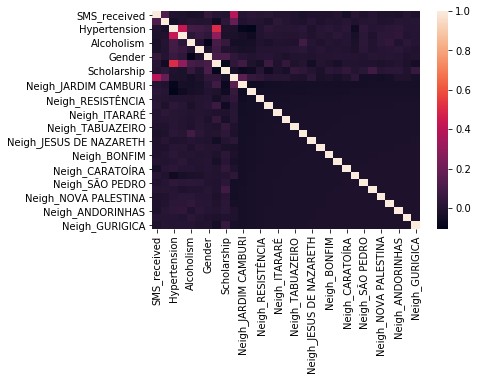

In [35]:
sns.heatmap(dm_all.corr())

In [36]:
dm_train=dm_all[dm_all['data']=='train']
del dm_train['data'] 

In [37]:
bd_test=dm_all[dm_all['data']=='test']
bd_test.drop(['No-show','data'],axis=1,inplace=True) 

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
x_train=dm_train.drop('No-show',axis=1)
y_train=dm_train['No-show']
y_train.dtype

dtype('int32')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(dm_train.values, i) for i in range(dm_train.shape[1])]

vif["features"] = dm_train.columns

In [ ]:
vif

In [39]:
params={'penalty':['l1','l2'],'class_weight':['balanced',None],
        'C':np.linspace(0.01,100,100)}

In [40]:
model=LogisticRegression()

In [41]:
rs=RandomizedSearchCV(model,param_distributions=params,n_iter=10,
                      scoring='roc_auc',cv=10,n_jobs=-1,verbose=20)

In [42]:
rs.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2....
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02]),
                                        'class_weight': ['balanced', None],
                                        'penalty': ['l1', 'l2']},
                   scoring='roc_auc', verbose=20)

In [43]:
trainPredProba = rs.predict_proba(x_train)[:, 1]

In [44]:
len(trainPredProba)

99490

In [46]:
roc_auc_score(y_train, trainPredProba)

0.6987215965428345

In [48]:
test_score=rs.predict_proba(bd_test)[:,1]
test_score


array([0.5       , 0.5190517 , 0.5       , ..., 0.66086079, 0.68600291,
       0.68600291])

In [50]:
test_score=rs.predict_proba(bd_test)[:,1]
test_score


array([0.5       , 0.5190517 , 0.5       , ..., 0.66086079, 0.68600291,
       0.68600291])

In [52]:
len(test_score)

10854

In [53]:
pd.DataFrame(test_score).to_csv("shital_no_show.csv",index=False)